# Homework 01


Problem 1 : Machine Precision

In [2]:
import numpy as np

# Function to compute machine epsilon
def calculate_machine_precision(dtype):
    epsilon = dtype(1.0)
    while dtype(1.0) + dtype(epsilon / 2) != dtype(1.0):
        epsilon /= 2
    return epsilon

# Compute machine epsilon for single and double precision
epsilon_single = calculate_machine_precision(np.float32)
epsilon_double = calculate_machine_precision(np.float64)

print(f"Machine epsilon (single precision): {epsilon_single}")
print(f"Machine epsilon (double precision): {epsilon_double}")

Machine epsilon (single precision): 1.1920928955078125e-07
Machine epsilon (double precision): 2.220446049250313e-16


Problem 2 : Error assessment

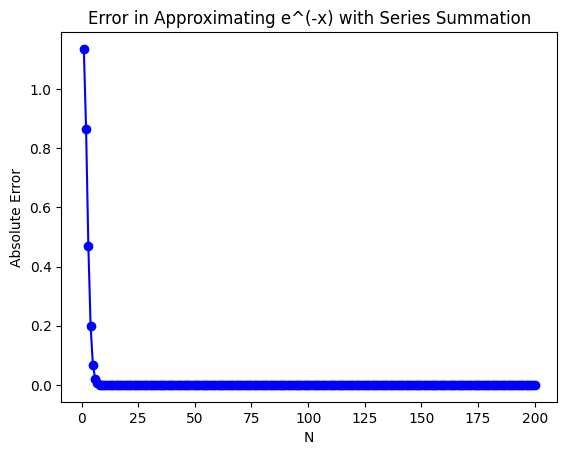

In [6]:
import math
import matplotlib.pyplot as plt

def calculate_series_sum(x, N):
    '''Function to calculate series sum'''
    sum = 0.0
    for n in range(N + 1):
        sum += ((-x)**n) / math.factorial(n)
    return sum

x = 2  # Set x value
Ns = range(1, 201)  # Range of N values to test
errors = [] # Make list for error values

for N in Ns:
    series_sum = calculate_series_sum(x, N) # Calculate series sum for given N
    actual_value = np.exp(-x) # Calculate actual value e^{-x}
    error = abs(actual_value - series_sum) # Calculate error
    errors.append(error) # Add error value to list

# Plot error as a function of N
plt.plot(Ns, errors, marker='o', color='b')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Error in Approximating e^(-x) with Series Summation')
plt.show()

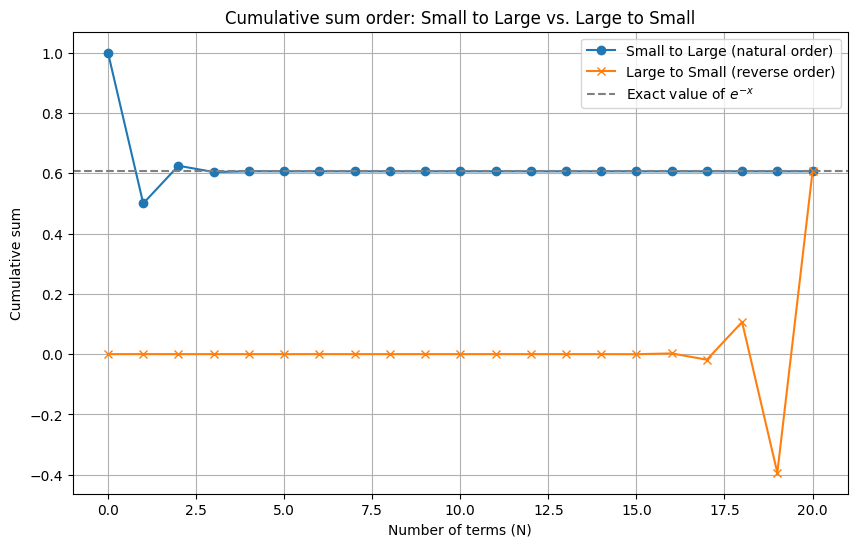

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp

# Function to compute the series sum in a specific order
def taylor_sum(x, N, reverse=False):
    if reverse:
        # Start from large n down to small n
        terms = [(-x)**n / factorial(n) for n in range(N + 1)][::-1]
    else:
        # Start from small n up to large n
        terms = [(-x)**n / factorial(n) for n in range(N + 1)]
    cumulative_sum = np.cumsum(terms)  # Cumulative sum at each step
    return cumulative_sum

# Parameters
x = 0.5
N_max = 20

# Compute cumulative sums
cumsum_small_to_large = taylor_sum(x, N_max, reverse=False)
cumsum_large_to_small = taylor_sum(x, N_max, reverse=True)

# Plot cumulative sums
plt.figure(figsize=(10, 6))
plt.plot(range(N_max + 1), cumsum_small_to_large, label="Small to Large (natural order)", marker='o')
plt.plot(range(N_max + 1), cumsum_large_to_small, label="Large to Small (reverse order)", marker='x')
plt.axhline(exp(-x), color='gray', linestyle='--', label="Exact value of $e^{-x}$")
plt.xlabel("Number of terms (N)")
plt.ylabel("Cumulative sum")
plt.title("Cumulative sum order: Small to Large vs. Large to Small")
plt.legend()
plt.grid()
plt.show()


4  Double-precision program to integrate an arbitrary function

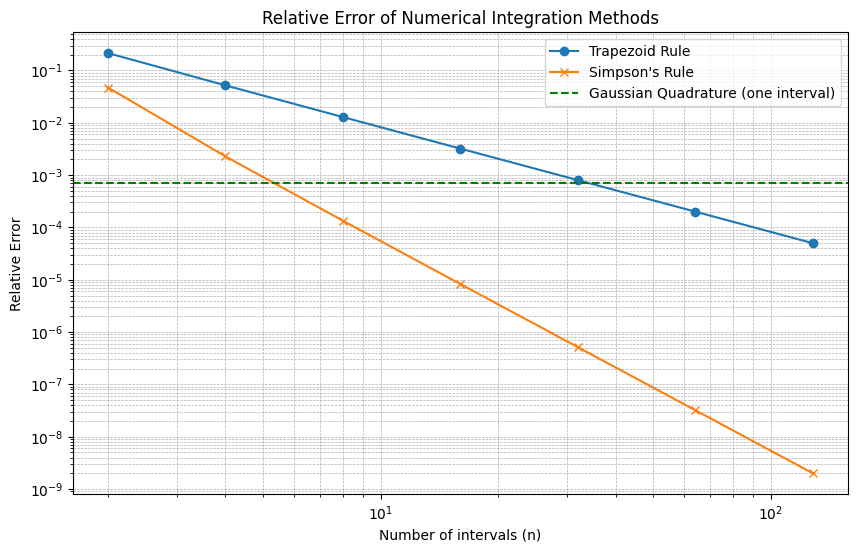

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    return np.sin(x)

# Exact integral value
exact_integral = 2.0

# Trapezoid rule implementation
def trapezoid_rule(f, a, b, N):
    '''
    Numerical integration of a function f over [a, b] using the trapezoid rule.

    f: Function to be integrated
    a: Lower limit of integration
    b: Upper limit of integration
    N: Number of segments
    '''
    h = (b - a) / N # Calculate the width of segments
    s = f(a) + f(b)  # Calculate the first and last terms
    for i in range(1, N):
        s += 2 * f(a + i * h)  # Sum the middle terms
    integral = (h / 2) * s  # Calculate the integral
    return integral

# Simpson's rule implementation
def simpson_rule(f, a, b, N):
    '''
    Numerical integration of a function f over [a, b] using Simpson's rule.

    f: Function to be integrated
    a: Lower limit of integration
    b: Upper limit of integration
    N: Number of segments (must be even)
    '''
    if N % 2 == 1: # Check if N is even
        raise ValueError('N must be an even number for Simpsons rule.')
    h = (b - a) / N # Calculate the width of segments
    s = f(a) + f(b)  # Calculate the first and last terms

    # Calculate the sum of the middle terms with coefficients 4 and 2
    for i in range(1, N, 2):
        s += 4 * f(a + i * h)
    for i in range(2, N - 1, 2):
        s += 2 * f(a + i * h)

    integral = (h / 3) * s  # Calculate the integral
    return integral

# 3-point Gaussian quadrature (one interval)
def gaussian_quadrature_3_point(f, a, b):
    '''
    Numerical integration of a function f over [a, b] using 3-point Gaussian quadrature.

    f: Function to be integrated
    a: Lower limit of integration
    b: Upper limit of integration
    '''
    # Weights and nodes for the 3-point Gaussian quadrature on the interval [-1, 1]
    weights = [5/9, 8/9, 5/9] # Weights for 3 point Gaussian quadrature
    nodes = [-np.sqrt(3/5), 0, np.sqrt(3/5)] # Nodes for 3 point Gaussian quadrature

    # Transform the nodes to the interval [a, b]
    transformed_nodes = [(b - a) / 2 * node + (b + a) / 2 for node in nodes]

    # Apply the Gaussian quadrature formula
    integral = (b - a) / 2 * sum(weights[i] * f(transformed_nodes[i]) for i in range(3))

    return integral

# Integration interval and number of intervals for trapezoid and Simpson
a, b = 0, np.pi
n_values = [2, 4, 8, 16, 32, 64, 128]

# Compute relative errors
relative_errors_trapezoid = []
relative_errors_simpsons = []
relative_errors_gaussian = []

for n in n_values:
    trapezoid_result = trapezoid_rule(f, a, b, n)
    simpsons_result = simpsons_rule(f, a, b, n)
    gaussian_result = gaussian_quadrature(f, a, b)

    trapezoid_error = np.abs((trapezoid_result - exact_integral) / exact_integral)
    simpsons_error = np.abs((simpsons_result - exact_integral) / exact_integral)
    gaussian_error = np.abs((gaussian_result - exact_integral) / exact_integral)

    relative_errors_trapezoid.append(trapezoid_error)
    relative_errors_simpsons.append(simpsons_error)
    relative_errors_gaussian.append(gaussian_error)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, relative_errors_trapezoid, label="Trapezoid Rule", marker='o')
plt.plot(n_values, relative_errors_simpsons, label="Simpson's Rule", marker='x')
plt.axhline(gaussian_error, color='g', linestyle='--', label="Gaussian Quadrature (one interval)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of intervals (n)")
plt.ylabel("Relative Error")
plt.title("Relative Error of Numerical Integration Methods")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
